In [3]:
import numpy as np
from labtools import time_freq_scan as tfs
import labtools as lt
from matplotlib import pyplot as plt
from matplotlib import cm
import os
from scipy.signal import find_peaks
import pandas as pd
from labtools import scanner
from scipy.optimize import curve_fit
from numpy import array
from scipy.cluster.vq import vq, kmeans, whiten
import matplotlib.pyplot as plt

In [4]:
from ipywidgets import RadioButtons, Layout
from IPython.display import display
from ipywidgets import HBox, VBox
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [5]:
folder = "/home/bbuusshh/my_git/data/dip/24"

In [6]:
os.listdir(folder)

['4st_bg_0_2.dump',
 'dip_8st_0bg_2.dump_imgs',
 'g2_highI_0.dump_imgs',
 'saturation_scan_2_0.dump_imgs',
 'saturation_scan_0.dump_imgs',
 'dip_8st_bg_0_a_zoomed_0.dump_imgs',
 'g2_with_magnet_0.dump_imgs',
 'changing_pulse_len_0.dump_imgs',
 'dip_8st_0bg_1.dump_imgs',
 'dip_8st_0bg_1.dump',
 'dip_8st_bg_0_a_0.dump',
 '4st_bg_0_0.dump',
 'dip_8st_bg_56_0.dump_imgs',
 'changing_pulse_len_0.dump',
 'dip_8st_bg_56_0.dump',
 '4st_bg_0_1.dump_imgs',
 '4st_bg_0_1.dump',
 'g2_with_magnet_front_0.dump',
 'moles_scan_tempo_0.dump_imgs',
 'tem',
 'dip_8st_0bg_0.dump',
 '4st_bg_46_2mols_0.dump_imgs',
 'g2_with_magnet_back_1.dump_imgs',
 '4st_bg_0_0.dump_imgs',
 'saturation_scan_0.dump',
 'dip_8st_bg_0_a_1.dump',
 'g2_0.dump_imgs',
 'g2_highI_0.dump',
 '4st_bg_46_1.dump',
 'dip_8st_bg_70_0.dump_imgs',
 'dip_8st_0bg_2.dump',
 'saturation_scan_2_0.dump',
 'g2_with_magnet_back_0.dump_imgs',
 'dip_8st_bg_70_0.dump',
 '4st_bg_46_0.dump',
 'g2_with_magnet_0.dump',
 'g2_with_magnet_front_0.dump_imgs',
 

In [8]:
dump_dip = "dip_8st_bg_56_0.dump"

In [9]:
data = np.fromfile(os.path.join(folder, dump_dip),count=int(1e8), dtype=lt.DUMP_TYPE)

In [10]:
data = lt.shift_channels(data, 80000, [5])

In [11]:
data = lt.assign_trigs_to_clicks(data, pix_trigs=[6,7], return_trig=True)
trig = lt.get_trig_len(data)
# data = data[data['channel']!= 5]

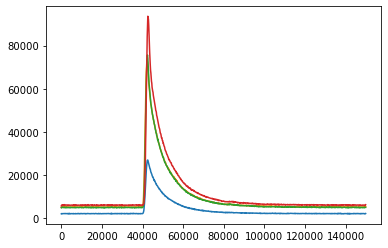

In [12]:
y, x = np.histogram(data['time_from_trig'][(data['channel']==1)], bins=1000, range=(0, trig))
plt.plot(x[:-1], y)
y, x = np.histogram(data['time_from_trig'][(data['channel']==2)], bins=1000, range=(0, trig))
plt.plot(x[:-1], y)
y, x = np.histogram(data['time_from_trig'][(data['channel']==3)], bins=1000, range=(0, trig))
plt.plot(x[:-1], y)
y, x = np.histogram(data['time_from_trig'][(data['channel']==4)], bins=1000, range=(0, trig))
plt.plot(x[:-1], y)

In [13]:
line_trig = 7
pix_trig = 6

In [14]:
d_0 = np.split(data, np.where(data['channel'] == line_trig)[0])
d_lines = np.array(list(map(lambda x: np.split(x, np.where(x['channel'] == pix_trig)[0]), d_0)))

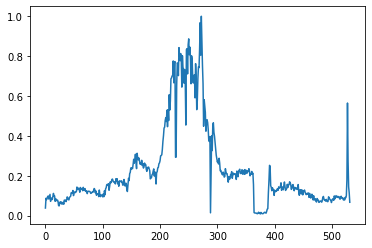

In [15]:
line = d_lines[1]
spectr = np.array([len(px) for px in line])
plt.plot(spectr/max(spectr))

In [16]:
d_lines = np.array(d_lines)

In [17]:
np.random.random_integers(0, len(d_lines), 4)

array([112,   5, 111,  29])

In [18]:
hist, times = np.histogram(data['time_from_trig'][np.isin(data['channel'], [1,2,3,4])], range=(0,trig), bins=100)

In [ ]:
def align_im(im, minerr=1000):
    
    errs = np.array([])
    for index, line in im.iterrows():
        
        indx = np.array(line.index)

        peaks, _ = find_peaks((line.values-min(line.values))/np.max(line.values), height=0.5, distance=len(line)*0.9)
        x = np.arange(line.shape[0])
        plt.plot(x[peaks], line.values[peaks],'o')
        if len(peaks) == 0:
            errs = np.append(errs, np.inf)
            continue

        peak = peaks[np.argmax([line.values[peaks]])]
        plt.plot(x[peak], line.values[peak],'o')
        plt.plot(x, line.values,'-')
        p0 = [1000,100,x[peak],np.mean(line)]
        try:
            popt, pcov = curve_fit(scanner.lorentz, x, line, p0)
            perr = np.sqrt(np.diag(pcov)[np.diag(pcov)>0])
            tot_err = perr.sum()
            errs = np.append(errs, tot_err)
            line = np.roll(line, int(-popt[2] + line.shape[0]/2))
            if tot_err < minerr:
                im.iloc[index] = line
                plt.plot(x, scanner.lorentz(x, *popt))
        except:
            print('shit')
            errs = npp.save("paper_plot_filled_2".append(errs, np.inf)
            continue
    return im, errs
   

3393.7463602192256
60.054973007373675
245.87655504312525
229691367.1355741
13.228642138552853
23.47146032451357
14.042414035061778
91.16337327882769
83.00926686417611
27.936425350835073


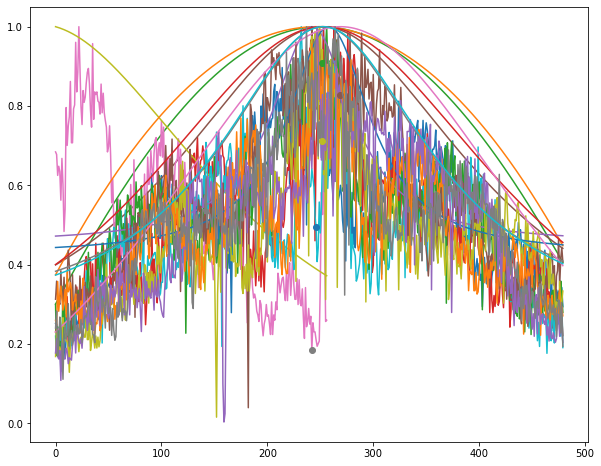

In [22]:
plt.figure(figsize=(10, 8))
errs = []
for line in d_lines[np.random.random_integers(0, len(d_lines)-1, 10)]:
    line = line[20:500]
    
    peak_distance_param=0.25
    peak_height_param=0.1
    peaks, _ = find_peaks(hist/np.max(hist), height=0.8, distance=len(hist)/2)
    spectr = np.array([len((px[np.abs(px['time_from_trig'] - times[peaks[0]]) < 10_000])) for px in line])
    try:
        peaks, _ = find_peaks(spectr/np.max(spectr), height=peak_height_param, distance=len(spectr)*peak_distance_param)
        pk = peaks[spectr[peaks].argmax()]
        fr = np.arange(len(spectr))
        popt, pcov =curve_fit(scanner.lorentz, fr, spectr, p0=[100,100,pk,100])
        perr = np.sqrt(np.diag(pcov)[np.diag(pcov)>0])
        tot_err = perr.sum()
        print(tot_err)
        errs.append(tot_err)
        pk = int(popt[2])
        plt.plot(fr,spectr/max(spectr))
        plt.plot(fr[pk], spectr[pk]/max(spectr), 'o')
        plt.plot(fr, scanner.lorentz(fr, *popt)/max(scanner.lorentz(fr, *popt)))
    except:
        continue

In [24]:
def get_most_often_linelen(d_lines, clusters=2):
    pxls  = np.array([len(i) for i in d_lines])
    whitened = whiten(pxls)
    centroids, distortion = kmeans(whitened,clusters)
    clx,_ = vq(whitened,centroids)
    clust = np.argmax([len(clx[clx==c]) for c in np.unique(clx)])
    lines_pxs = np.mean(pxls[clx == clust]).astype(int)
    return lines_pxs, pxls, clx,clust, distortion

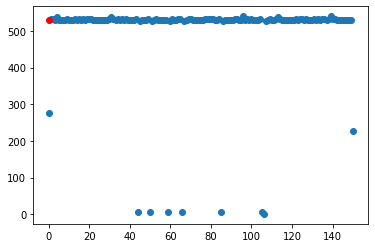

In [25]:
lines_pxs, pxls, clx,clust, distortion = get_most_often_linelen(d_lines, clusters=4)
plt.plot(pxls, 'o')
plt.plot(lines_pxs, 'ro')

In [26]:
pxls  = np.array([len(i) for i in d_lines[clx==clust]])
pxls

array([532, 532, 531, 531, 531, 531, 531, 532, 531, 531, 531, 532, 530,
       532, 531, 532, 531, 532, 532, 532, 531, 531, 531, 531, 531, 531,
       531, 531, 532, 532, 531, 532, 531, 532, 531, 532, 531, 531, 531,
       531, 532, 527, 531, 531, 531, 532, 527, 531, 532, 531, 531, 531,
       531, 531, 527, 532, 531, 531, 532, 532, 527, 531, 532, 532, 531,
       531, 531, 531, 531, 531, 532, 532, 532, 532, 532, 531, 530, 532,
       527, 531, 531, 531, 531, 531, 532, 533, 531, 531, 531, 532, 531,
       532, 531, 531, 531, 532, 527, 531, 532, 531, 531, 533, 532, 531,
       531, 531, 531, 531, 531, 531, 532, 531, 532, 532, 531, 532, 531,
       531, 530, 532, 531, 532, 531, 532, 532, 531, 532, 532, 532, 531,
       531, 531, 531, 531, 531, 531, 531])

In [27]:
d_lines = np.array(d_lines)[clx==clust]

In [28]:
px_min = min(np.array([len(i) for i in d_lines]))
px_min

527

In [29]:
px_max = max(np.array([len(i) for i in d_lines]))
px_max

533

We constrain line pixel len by line_x[0:px_min-1], as the scan return tim eis for some mystical reason variable

## Align!

In [30]:
hist, times = np.histogram(data['time_from_trig'][np.isin(data['channel'], [1,2,3,4])], range=(0,trig), bins=100)

In [31]:
center = (int(d_lines[1][-1][0]['time']) - int(d_lines[1][0][0]['time']))/2
peak_distance_param=0.25
peak_height_param=0.1

shifts = []
errs = []
for line in np.array(d_lines):
    line = line[0:500]
    t = [int(px[0]['time']) - int(line[0][0]['time']) for px in line]
    #spectr = np.array([len(px) for px in line])
    peaks, _ = find_peaks(hist/np.max(hist), height=0.8, distance=len(hist)/2)
    spectr = np.array([len((px[np.abs(px['time_from_trig'] - times[peaks[0]]) < 10_000])) for px in line])
    peaks, _ = find_peaks(spectr/np.max(spectr), height=peak_height_param, distance=len(spectr))
    if len(peaks)*len(spectr) == 0:
        errs.append(np.inf)
        continue
    pk = peaks[spectr[peaks].argmax()]
    fr = np.arange(len(spectr))
    try:
        popt, pcov =curve_fit(scanner.lorentz, fr, spectr, p0=[100,100,pk,100])
        perr = np.sqrt(np.diag(pcov)[np.diag(pcov)>0])
        tot_err = perr.sum()
        errs.append(tot_err)
        if tot_err < 80:
            pk = int(popt[2])
        else:
            continue
    except:
        errs.append(np.inf)
        continue
        print("skip")
    sh = t[pk]
    #plt.plot(fr,spectr)
    #plt.plot(fr[pk], spectr[pk], 'o')
    shift = sh - center
    shifts.append(shift)
    #print(sh)
    line[0]['time'] = line[0]['time'] + shift
    #line = [px['time'] + shift for px in line]


In [32]:
data = None

In [33]:
binNum = 200

In [34]:
img = np.zeros((px_min, binNum))
for line_x in d_lines[1:]:
    line = np.zeros(binNum)
    for px in line_x[0:px_min-1]:
        y,x = np.histogram(px['time_from_trig'], bins=binNum, range=(10, trig))
        line = np.vstack((line, y))
    img = np.dstack((img, line))

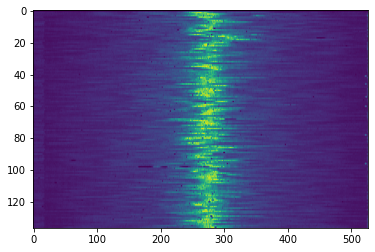

In [37]:
plt.imshow(img.sum(axis=1).T, aspect='auto')

In [38]:
import seaborn as sns

In [39]:
folder

'/home/bbuusshh/my_git/data/dip/24'

In [40]:
folder_scans = os.path.join(folder, "ExpI")
scans = pd.DataFrame(os.listdir(folder_scans), columns=['Name'])

scans = scans.iloc[np.argsort(scans["Name"].apply(lambda x: int(x[-2:])))]
imgs = []
names = []
freqs = []
for scan in scans["Name"]:
    header, raw, freq = scanner.xtract(f"{folder_scans}/{scan}")
    imgs.append(raw)
    names.append(scan)
    freqs.append(freq)

In [41]:
def plot_imgs(scan):
    plt.imshow(imgs[scan], aspect='auto')
    
interact(
    plot_imgs, 
    scan = widgets.RadioButtons(
    options=range(len(scans)),
    description='Scans:',
    disabled=False,
))

interactive(children=(RadioButtons(description='Scans:', options=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13â€¦

<function __main__.plot_imgs(scan)>

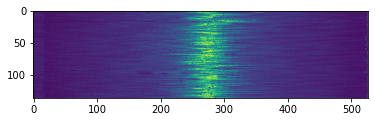

In [42]:
plt.imshow(img.sum(axis=1).T)

In [43]:
(freqs[9] - freqs[9][0]).shape

(500,)

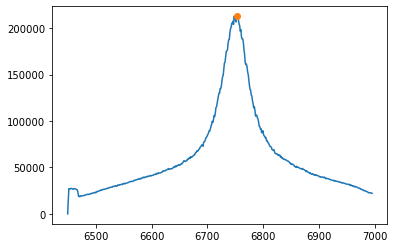

In [45]:
y = img[:500,:,:].sum(axis=2).T.sum(axis=0)

peaks, _ = find_peaks((y-min(y))/np.max(y), height=0.5, distance=len(y)*0.9)

plt.plot(freqs[9] ,y)
plt.plot(freqs[9][peaks] ,y[peaks], 'o')

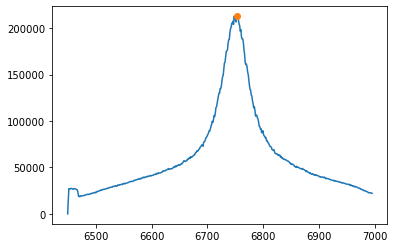

In [46]:
y = img[:500,:,:].sum(axis=2).T.sum(axis=0)

peaksF, _ = find_peaks((y-min(y))/np.max(y), height=0.5, distance=len(y)*0.9)

plt.plot(freqs[9] ,y)
plt.plot(freqs[9][peaksF] ,y[peaksF], 'o')

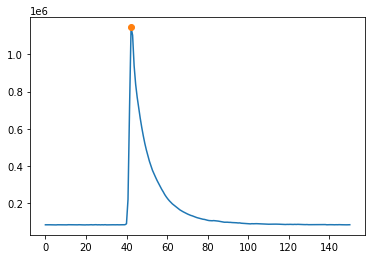

In [47]:
y = img[:500,:,:].sum(axis=2).T.sum(axis=1)
t = np.linspace(0, trig/1000, len(y))

peaksT, _ = find_peaks((y-min(y))/np.max(y), height=0.5, distance=len(y)*0.9)

plt.plot(t ,y)
plt.plot(t[peaksT] ,y[peaksT], 'o')

In [48]:
dfreq = (freqs[9] - freqs[9][0])
ddd = (dfreq - dfreq[peaksF])
ddd = ddd - ddd % 2
im = pd.DataFrame(img[:500,:,:].sum(axis=2).T, columns=ddd)
im.index = (t - t[peaksT]).astype(int)

In [49]:
#plt.imshow(np.abs(ddd - xlabels[:,np.newaxis]), aspect='auto')

In [54]:
xlabels = np.arange(-250, 250, 50) 
xticks = [np.where(tk == min(tk))[0][0] for tk in np.abs(ddd - xlabels[:,np.newaxis])]

In [55]:
ylabels = np.arange(-25, 125, 25) 
yticks = [np.where(tk == min(tk))[0][0] for tk in np.abs((t - t[peaksT]).astype(int) - ylabels[:,np.newaxis])]

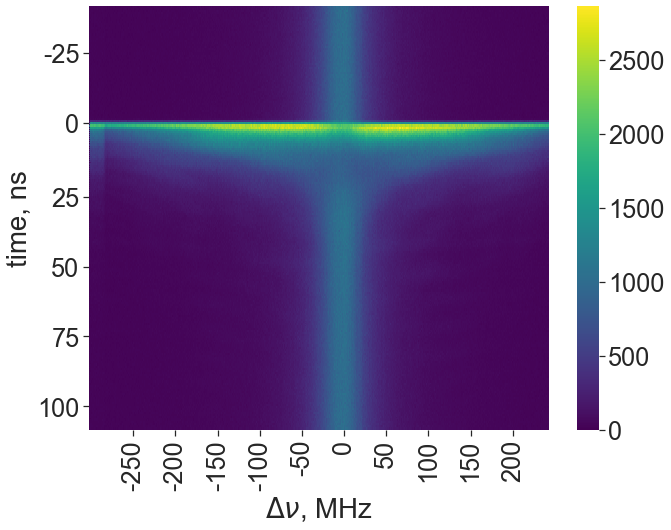

In [56]:
plt.figure(figsize=(10, 8))
sns.set(font_scale=2.3, style='ticks', font="Arial")
ax = sns.heatmap(im,yticklabels=ylabels,xticklabels=xlabels, cmap=cm.viridis)
ax.set(xlabel=r'$\Delta \nu$, MHz', ylabel='time, ns')
ax.set_xticks(xticks)
ax.set_yticks(yticks)
plt.yticks(rotation=0) 
plt.tight_layout()
plt.savefig("8st_56bg.png", dpi=300)

In [57]:
y, x = np.histogram(img[:,:,:].sum(axis=2).T[58])

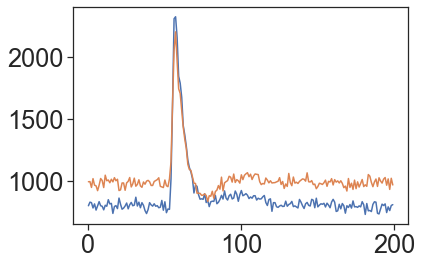

In [58]:
plt.plot(img[:,:,:].sum(axis=2)[260])
#plt.plot(img[:,:,:].sum(axis=2)[265])
plt.plot(img[:,:,:].sum(axis=2)[270])

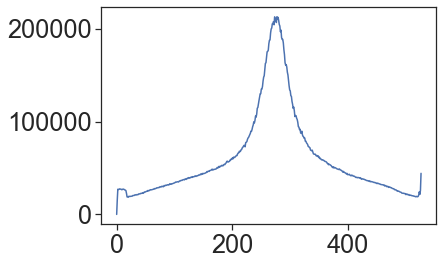

In [59]:
plt.plot(img[:,:,:].sum(axis=1).T.sum(axis=0))